# Vector Space Models

In this tutorial we will explore cosine similarity, Euclidean distances . After that we will analyze a pretrained word vector. 

## Cosine Similarity and Euclidean  Distance

In this part of the tutorial we will explore difference between Euclidean distance and cosine distance.

In [1]:
from scipy.spatial.distance import euclidean,cosine
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

Let’s assume we have 2 documents about neural networks and we small corpus from one of these papers.  We want to determine  which document this corpus belongs to with comparing mentions of torchtext and pytorch keywords. Mentions of pytorch and torchtext shown below.

In [2]:
paper1 = [30,60]
paper2 = [30,10]
corpus = [10,30]

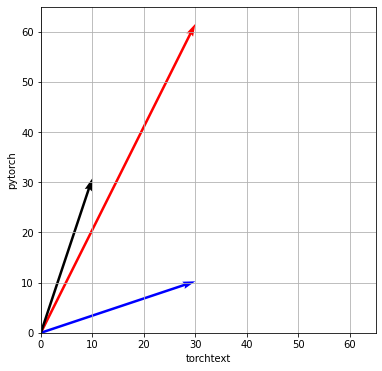

In [3]:
V = np.array([paper1,paper2,corpus])
origin = np.array([[0, 0, 0],[0, 0, 0]])
plt.figure(figsize=(6,6))
plt.quiver(*origin  , V[:,0],V[:,1],scale= 65,color=['r','b','black'])

axes = plt.gca()
axes.set_xlim([0,65])
axes.set_ylim([0,65])
axes.set_xlabel('torchtext')
axes.set_ylabel('pytorch')
plt.grid()
plt.show()

#red is paper 1 and blue is paper 2

As we can see from the plot we can assume that  corpus belongs to corpus 1 let’s check more statistically.

In [4]:
print('Euclidean  distance between paper1 and corpus:' , euclidean(paper1,corpus))
print('Euclidean  distance between paper2 and corpus:' , euclidean(paper2,corpus))

Euclidean  distance between paper1 and corpus: 36.05551275463989
Euclidean  distance between paper2 and corpus: 28.284271247461902


In [5]:
print('Cosine similarity between paper1 and corpus:' , cosine_similarity([paper1],[corpus])[0][0])
print('Cosine similarty between paper2 and corpus:' , cosine_similarity([paper2],[corpus])[0][0])

Cosine similarity between paper1 and corpus: 0.9899494936611667
Cosine similarty between paper2 and corpus: 0.6


As we can see from the calculations Euclidean distances show that  paper2 more close to our corpus distance wise on the other hand cosine similarity shows that paper1 is more similar to the corpus.

This situation caused due to Euclidean distance  simply measures distance between vectors while cosine similarity measures the angle. Euclidian distance can give wrong measurement of similarity when data point have different frequencies  between different data points. On the other hand cosine similarity does not affected by different sized data points because it measures angles.

## Pretrained Word Vectors

For this topic we will use Gensim library. Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Firstly lets import required libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim.test import utils
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA

In [7]:
#while using colab uncomment following lines

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
%ls

gdrive/  sample_data/


In [9]:
%cd gdrive/MyDrive/IS784_2021/4/vector/

/content/gdrive/MyDrive/IS784_2021/4/vector


For convaniance sake we will use pre-trained word vector Glove. Gensim give support for converting it to word2vec format.

Glove's project page can be found [Standford's NLP group](https://nlp.stanford.edu/projects/glove/). pretrained word vectors can be found [under same project page](https://nlp.stanford.edu/data/glove.6B.zip). We will talk about Glove more detailly in next part of the tutorial.

We will user 100 dimensional network for this example you are free to try other ones.

In [10]:
w2v = utils.get_tmpfile('Word2vec.txt')

glove2word2vec("glove.6B.100d.txt", w2v)  #gensim script that turns glove file to word2vec format

(400000, 100)

In [11]:
data = KeyedVectors.load_word2vec_format(w2v) #KeyedVectors prevents further training but uses less RAM

As mentioned in lecture we use cosine similarity to measure similarity between two words.

In [12]:
data.similarity("apple","pear")

0.58901256

In [13]:
data.similarity("door","pen")

0.34099886

More conveniat function is `most_similar`. This function lists closest words by looking their cosine similarity

In [14]:
data.most_similar('apple')

[('microsoft', 0.7449405789375305),
 ('ibm', 0.6821643710136414),
 ('intel', 0.6778088212013245),
 ('software', 0.6775422096252441),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.66175377368927),
 ('iphone', 0.6595611572265625),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579985618591)]

In [15]:
data.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690191268921),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919990181922913),
 ('kingdom', 0.6811410188674927),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712857484817505),
 ('ii', 0.6676074266433716)]

We can also employ this functions `positive` and  `negative` attiributes to do vector substraction

In [16]:
data.most_similar(positive=["female","king"],negative =["male"])  #removing male from king and adding female gives queen

[('queen', 0.7530024647712708),
 ('prince', 0.7241036891937256),
 ('brother', 0.6881160736083984),
 ('monarch', 0.6810021996498108),
 ('george', 0.6763365864753723),
 ('father', 0.6737973093986511),
 ('son', 0.6680605411529541),
 ('kingdom', 0.6605274677276611),
 ('uncle', 0.6432946920394897),
 ('edward', 0.6366986036300659)]

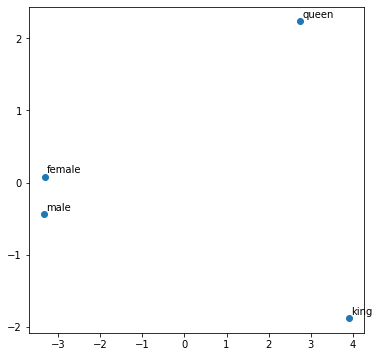

In [17]:
words = ["king","queen","male","female"]

word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)

In [18]:
data.most_similar(positive=["short","fast"],negative =["slow"]) #similarly removing slow from fast adding short give long

[('long', 0.693204402923584),
 ('four', 0.6256639361381531),
 ('times', 0.6254057884216309),
 ('limited', 0.6253915429115295),
 ('shorter', 0.623638391494751),
 ('one', 0.6235553026199341),
 ('full', 0.6227924227714539),
 ('three', 0.6204848289489746),
 ('five', 0.6187273263931274),
 ('time', 0.6181092858314514)]

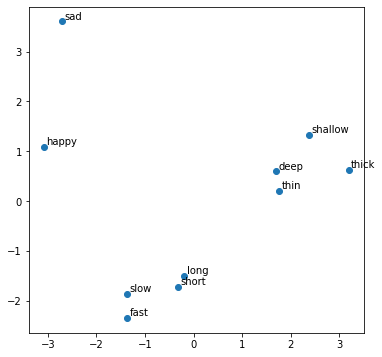

In [19]:
words = ["short","long","fast","slow","thin","thick","sad","happy","shallow", "deep"]

word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)

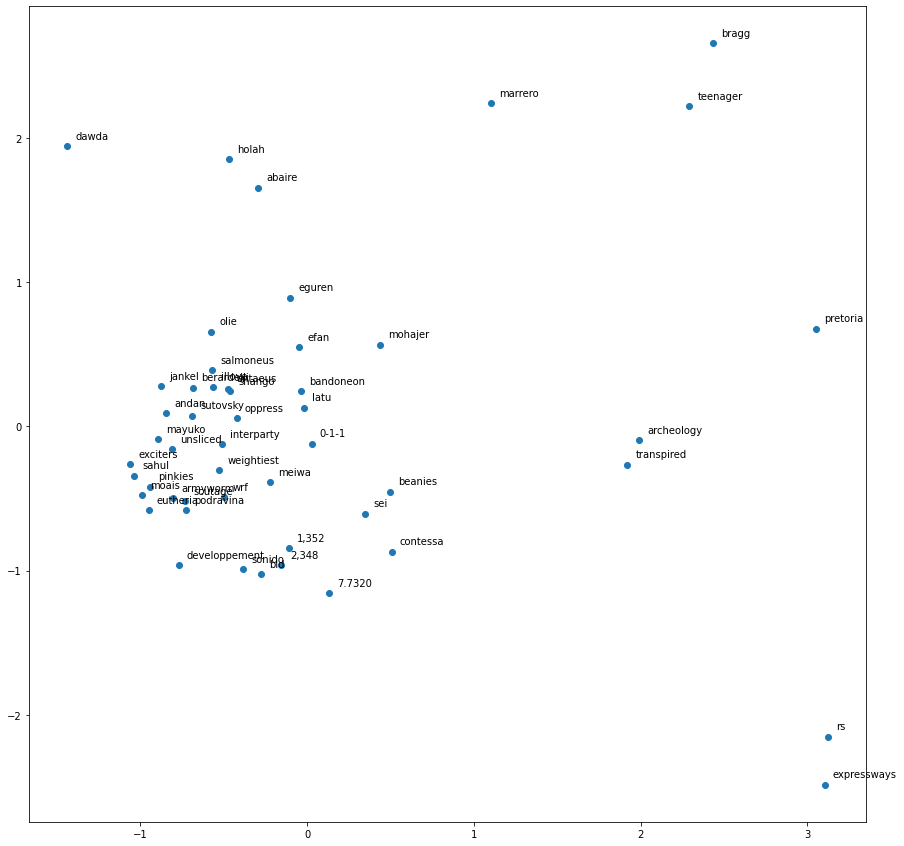

In [20]:
words=np.random.choice(list(data.vocab.keys()),50)  #lets see for random sample of words
word_vectors = np.array([data[w] for w in words])

extracted_data = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(15,15))
plt.scatter(extracted_data[:,0], extracted_data[:,1])
for word, (x,y) in zip(words, extracted_data):
    plt.text(x+0.05, y+0.05, word)